In [4]:
def sample_points(k):
    x = np.random.rand(k,50)
    y = np.random.choice([0, 1], size=k, p=[.5, .5]).reshape([-1,1])
    return x,y

In [16]:
import numpy as np

class MAML(object):
    def __init__(self):
        
        #initialize number of tasks i.e number of tasks we need in each batch of tasks
        self.num_tasks = 10
        
        #number of samples i.e number of shots -number of data points (k) we need to have in each task
        self.num_samples = 10

        #number of epochs i.e training iterations
        self.epochs = 10000
        
        #hyperparameter for the inner loop (inner gradient update)
        self.alpha = 0.0001
        
        #hyperparameter for the outer loop (outer gradient update) i.e meta optimization
        self.beta = 0.0001
       
        #randomly initialize our model parameter theta
        self.theta = np.random.normal(size=50).reshape(50, 1)
        
    def sigmoid(self, a):
        return 1.0 / (1 + np.exp(-a))

    def train(self):
        task_losses = []  # To store task-wise losses

        for e in range(self.epochs):
            self.theta_ = []
            task_losses_epoch = []  # Collect losses per epoch

            for i in range(self.num_tasks):
                XTrain, YTrain = sample_points(self.num_samples)
                a = np.matmul(XTrain, self.theta)
                YHat = self.sigmoid(a)
                loss = ((np.matmul(-YTrain.T, np.log(YHat)) - np.matmul((1 - YTrain.T), np.log(1 - YHat))) / self.num_samples)[0][0]

                task_losses_epoch.append(loss)  # Store loss for this task
                gradient = np.matmul(XTrain.T, (YHat - YTrain)) / self.num_samples
                self.theta_.append(self.theta - self.alpha * gradient)

            task_losses.append(task_losses_epoch)  # Store losses for all tasks in this epoch

            meta_gradient = np.zeros(self.theta.shape)

            for i in range(self.num_tasks):
                XTest, YTest = sample_points(10)
                a = np.matmul(XTest, self.theta_[i])
                YPred = self.sigmoid(a)
                meta_gradient += np.matmul(XTest.T, (YPred - YTest)) / self.num_samples

            self.theta = self.theta - self.beta * meta_gradient / self.num_tasks

            print(f"Epoch {e}: Losses per task: {task_losses_epoch}\n")
            print('Updated Model Parameter Theta\n')
            print('Sampling Next Batch of Tasks \n')
            print('---------------------------------\n')

            # Calculate task-wise adaptation error (average loss across epochs for each task)
        avg_task_losses = np.mean(task_losses, axis=0)
        task_adaptation_error = list(avg_task_losses)
        print(f"Task-wise adaptation error: {task_adaptation_error}")


In [17]:
model = MAML()

In [18]:
model.train()

Epoch 0: Losses per task: [1.1577536978773852, 1.573638873721118, 1.7010707638057851, 2.1063369792043805, 1.512158777692027, 1.2145150162059193, 1.5363904144282823, 2.3125656921437625, 2.1341239570324193, 0.41857193728211345]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1: Losses per task: [1.2129439614832662, 0.6927564907113906, 1.3480013078362185, 3.361105076848434, 1.0112186977974607, 1.1616313670309582, 0.8091242555375662, 2.134094869635109, 1.3034847342506342, 0.7605389365789325]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2: Losses per task: [1.574349245208985, 1.4798367197741449, 1.4214826971824117, 1.5335347926402108, 1.6574023552570751, 1.820816756923103, 0.4114187661721087, 0.8145332961827071, 1.8076082344867987, 1.0487641549153983]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3: Losses per task: [1.4

Epoch 189: Losses per task: [1.322005666945515, 1.2081220076123251, 1.3837591696233515, 1.2166862432774583, 1.93409085649022, 1.0732470925670863, 0.978656325902486, 0.5203794976414869, 0.805933099339202, 1.802555924712768]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 190: Losses per task: [0.7380844368833046, 0.6156167828889197, 1.166142901019405, 1.2826910585881814, 0.9846850915036411, 1.4268064216861582, 0.4147196592325672, 0.9384213082773358, 1.0128205886882324, 1.5713722126147314]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 191: Losses per task: [1.097419657191727, 2.0242046757968555, 1.6918978182883162, 0.6696778715274283, 1.3061259176967661, 0.7647514332245254, 2.404497791188049, 1.0106100873169113, 1.496159558419703, 1.7722766016823517]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 192: Losses per task: [

Epoch 371: Losses per task: [0.7786407977254269, 1.706931135573501, 2.0538828382780667, 2.2965491245846517, 1.9636879667065272, 1.445885479703764, 1.5295372797536706, 1.440971536465479, 1.2249157425104182, 1.0038015412298322]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 372: Losses per task: [1.3216203937232245, 1.4410726998081809, 1.2170907712166799, 1.3338064874292723, 1.5630500450629676, 0.9822738893575742, 1.5819793675207863, 1.1398333850397613, 1.3534475897121943, 1.9419931813851576]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 373: Losses per task: [1.3855731687633202, 0.8712488545829176, 1.3692507654046364, 1.5075262346309874, 2.0091716209318804, 1.0355205054609395, 0.28484748907821683, 1.6505005091628504, 3.0057491833905763, 1.7288008981514362]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 374: Losses per

Epoch 555: Losses per task: [0.5590703571584771, 1.1195729171697502, 1.840831091482023, 1.3049779167777076, 1.8030141099737318, 1.1921436069925229, 1.5118108196565063, 1.0756388995157613, 1.1177538701381504, 1.148235437128538]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 556: Losses per task: [1.0950942124532141, 1.649143319680105, 0.4968369157987002, 1.6296595710454587, 0.789546065865367, 1.580880658117285, 2.2288090221885555, 1.6452841580348196, 0.9284970827807772, 1.8750019783337906]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 557: Losses per task: [1.7212735119925853, 2.0858775918338726, 0.7237282799245948, 1.7408215165326104, 1.1358600948838815, 1.9279965820463676, 0.5787645756588132, 0.8960192351779359, 1.200854843670642, 1.673455053451945]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 558: Losses per task

Epoch 737: Losses per task: [1.0381822904117757, 1.5359564753079449, 1.3910972160248336, 1.0819957847520645, 0.6642694455698563, 1.9043646805211307, 1.144383721582649, 1.1412358892692098, 1.4887336595373446, 0.669579219764945]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 738: Losses per task: [0.6945445616658376, 1.229337287975503, 0.5891019961595934, 1.781021216426612, 1.094893273753121, 0.48392901657646803, 1.103998624861316, 1.7790312712671077, 1.1118471819607871, 2.479942074179495]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 739: Losses per task: [1.8065315954703043, 1.1189801696295565, 1.5776834079017485, 1.5183224113151146, 1.032191949747232, 2.325864493397695, 0.8203491351357183, 1.2492576466787297, 1.1372862003015398, 0.8922471531737861]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 740: Losses per task:

Epoch 915: Losses per task: [0.7167995893015637, 2.3696377413444187, 1.8306645965716684, 1.6539698347213316, 2.077774421215618, 2.316815569549834, 1.2378628249936003, 2.8482435228836587, 1.7299450115244817, 0.8794658165841458]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 916: Losses per task: [0.5523421617969511, 0.8901690391727725, 1.6823116691165496, 1.096056013973167, 1.1424260841651392, 0.957150702899693, 0.8929306135225662, 1.4472138987916578, 1.9348105742272323, 1.6923173167716243]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 917: Losses per task: [1.5514901787227733, 2.6556015832615296, 0.6791671682741397, 1.859641354387297, 0.9499400308090685, 1.5383978106678, 2.065602841606247, 2.03589182676715, 1.8743091042410178, 0.9775363551882826]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 918: Losses per task: [1

Epoch 1097: Losses per task: [1.4127434530011775, 1.269211974480076, 0.9595675136264923, 0.5467767019239407, 0.9893766046272804, 1.946548848901248, 1.1815070210748548, 1.2841275552398541, 1.0297300320570244, 1.2638798434319116]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1098: Losses per task: [1.4812262023066434, 0.9995078581114061, 1.4824412999323027, 0.8568788639504733, 1.0065310840804693, 0.9992520736399946, 1.8052520432075458, 1.3791474968767827, 1.2076752687612793, 1.1449459955172565]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1099: Losses per task: [0.7131712868292717, 1.2551164226317626, 1.9745889158788512, 0.8769446580836149, 1.2335362901487414, 1.6751074354464126, 1.1945959896324214, 0.5199685812752709, 1.1818938966725219, 1.6263549772457986]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1100: Losses

Epoch 1282: Losses per task: [1.0767298180877916, 0.7749050619601136, 0.3313838894553892, 0.7273830364559276, 0.9146337068064418, 2.1152028657525785, 1.1905796096645778, 0.6194486722401298, 1.9959244694576577, 1.4784843790217859]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1283: Losses per task: [1.2517238868966547, 1.335390016260116, 1.7669456099001366, 1.2498766354834085, 0.8873423857230793, 1.4682835360321878, 1.968548428561655, 1.4993681211006216, 1.710956531594492, 0.8492687969905258]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1284: Losses per task: [1.2707830216769804, 0.7002076482997384, 0.6542419523145138, 1.754160243559165, 1.8136888468773342, 0.6951108947799363, 1.2391765053061454, 2.1996289399127176, 0.9349603012099987, 2.681429230809779]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1285: Losses pe

Epoch 1454: Losses per task: [1.2869877966951253, 1.6282218173201843, 1.7264201200734697, 2.505660055348236, 1.1580787100878047, 0.8105435667126611, 1.826664879073529, 0.38888003134818405, 1.758527669839537, 2.272608218245616]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1455: Losses per task: [0.958914422683069, 1.2755246667902664, 0.5427681684035222, 1.6157763887584171, 1.0281745900553334, 1.2222866547588105, 2.097059713115499, 1.076178313248093, 1.0909871410390988, 2.3406396919560137]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1456: Losses per task: [0.6724773897278907, 0.8534188254857712, 0.7844045839302399, 0.6850922941663641, 1.5747345788437084, 2.3788969322598135, 2.4016282420777832, 2.3182174586706927, 1.0501042131307492, 2.3705788090450794]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1457: Losses per

Epoch 1632: Losses per task: [1.5422677590454128, 1.3616803455589195, 2.0442802539067757, 1.9047618223237528, 1.4223698359074128, 1.6150880514132158, 1.5993445242718791, 1.2618240407653154, 0.8626721069710692, 1.7392407119782078]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1633: Losses per task: [1.853727600871577, 1.5135559984855942, 1.3505470544293754, 1.4999575862848618, 1.4347309366851895, 1.3909653993444717, 0.7929913118866246, 0.687211314468184, 0.6925238973716046, 0.927384012363316]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1634: Losses per task: [1.1474292417353886, 2.138755891842069, 1.8472362997174052, 0.5284642202696639, 2.072160480685589, 1.1555049482901834, 1.7514326352330278, 1.0469459374503496, 1.0344873272770219, 0.614020225758343]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1635: Losses per

Epoch 1820: Losses per task: [0.941409993549094, 0.9510732417987204, 0.6964197334257263, 1.4281649520130766, 0.6731638887622502, 1.5276976948551164, 1.3169469340549635, 0.936988844070689, 0.9170245189494473, 0.8069735804216629]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1821: Losses per task: [1.562842469017348, 1.4666446354589227, 0.9165471158587705, 1.175219049039616, 1.7354969654418402, 0.6013552643648529, 0.6999729187098733, 1.9415076825460447, 1.646062865380593, 1.0605205091583405]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1822: Losses per task: [1.7691780148736378, 1.2824745158668676, 1.2083133872908618, 2.3623623797057722, 0.9339392721250185, 1.166440043053574, 1.8510161884263951, 1.4742910672926157, 1.403831216759582, 1.887491329726333]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1823: Losses per t

Epoch 2002: Losses per task: [1.7971100160714653, 2.6626267512990394, 0.8358776508088134, 2.3197395289332037, 2.102126749963009, 1.3310209564968063, 1.2906736403481807, 0.9027696342937329, 1.3660874780674095, 1.2031952005018627]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2003: Losses per task: [0.6757944175829882, 0.9380217845331849, 1.4323522529054211, 1.1071976358073679, 1.2702702840781843, 1.4836130273767791, 1.7337744020037718, 0.2662688450870891, 1.0835039816120808, 1.3794965511930983]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2004: Losses per task: [0.8916725809088728, 1.370071662773789, 1.0847071394367915, 1.229774390859885, 0.5444349517166812, 1.3837192951439312, 2.004755636672134, 1.0190922446014494, 1.9687182810209116, 1.092926390981716]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2005: Losses pe

Epoch 2183: Losses per task: [1.1250819797765081, 1.2308052031220331, 1.6417330130572307, 1.3636612910582455, 0.9201108711728727, 2.0786081345497953, 1.4870523275743976, 1.823534254822875, 0.959937238916368, 1.0021860599709096]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2184: Losses per task: [1.1780718872444051, 0.9563821106719216, 0.5534248418118543, 1.4135214829490859, 1.51009279314324, 0.6794409957244228, 1.2613637695452495, 1.7201109475203826, 1.0873811625718806, 1.06989148311331]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2185: Losses per task: [1.0090512442595545, 1.239795116187578, 1.9029744435895346, 1.2056227670090767, 1.122887041241571, 0.40457601244514346, 1.0803835630859067, 0.943487759842289, 1.8617809885406404, 1.592577328287025]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2186: Losses per ta

Epoch 2382: Losses per task: [1.7254356172647036, 0.824691800844492, 1.4779788184552032, 2.0638999955187125, 0.7205507855501565, 1.503822522868309, 1.4888302617457854, 1.0898661478876792, 1.4322975789614867, 0.9782570854990462]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2383: Losses per task: [1.5781124173505694, 1.2735148897100668, 1.5776716642582607, 0.5748055337080471, 0.9151523281455972, 1.3355356625521964, 1.2043118461541502, 2.096712024324261, 0.8769193147427348, 1.512148355348732]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2384: Losses per task: [0.6803093307355926, 1.5730244460414904, 1.1383027604902525, 1.1924879383996216, 1.0604572201064646, 0.9198747965823666, 1.122232848813339, 0.4102354816985326, 0.7435499531596697, 1.0821377037519988]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2385: Losses pe

Epoch 2568: Losses per task: [0.4032531096300905, 2.016058451174996, 1.1593570679178158, 1.4937646866677676, 1.0948635359624395, 1.6549282251958164, 1.25959760284066, 0.6767630263213599, 1.5610751521298913, 1.1845253668320672]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2569: Losses per task: [0.7158847807210782, 1.708209077128026, 0.6619283104211335, 0.8009779026777897, 1.1065334426374145, 1.073379581289347, 0.6338898399105858, 1.1880497377687913, 1.2381684602227154, 2.0225472930138086]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2570: Losses per task: [1.7839830625890776, 1.5665310477494823, 1.0577432943893654, 0.8914903599285836, 0.43221543099030846, 1.4161881014451567, 1.1524529115853324, 1.3367103672902498, 1.4040719961860992, 1.4941511379227186]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2571: Losses p

Epoch 2744: Losses per task: [1.6253004395990431, 1.1167430251698136, 2.2821283150455285, 1.8282914355943862, 1.2875488499873733, 1.195297203439872, 1.1278219857052745, 1.0642155560083801, 1.8213308395632783, 0.35873188985550974]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2745: Losses per task: [3.0135575760170337, 0.9744708843734349, 1.102967826367862, 1.5660316049980396, 1.1404266734457504, 1.5713817521520022, 0.985482386617363, 1.4757275116586275, 0.8950154580018177, 1.516599654386423]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2746: Losses per task: [1.546037715508324, 0.5552651259317657, 0.6553807056538039, 1.3760609319877353, 1.317375727193685, 1.4099948238300475, 1.2001811285343331, 0.648006242324968, 0.4908009676386628, 1.1444078813363836]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2747: Losses per

Epoch 2924: Losses per task: [1.1766360677448422, 1.9247768513761063, 0.6701089839599563, 1.009933715931488, 1.1313047056785668, 1.2526443244285432, 2.1908334360523125, 1.7876267964247579, 1.6576525706970557, 1.2393269514815024]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2925: Losses per task: [1.373887528626605, 1.8767994151048388, 1.4066253969129288, 1.193934436491777, 1.4544433879704604, 1.5078720682678493, 1.0254694806221567, 0.7944797178696883, 2.0503324591994954, 1.5757738257939817]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2926: Losses per task: [1.7635878894348367, 1.810679567548961, 1.3055077228746548, 0.8872060396038297, 1.3197627472508817, 1.8912652227312106, 0.8520280583863908, 1.4405495780160782, 1.1485736294466384, 1.346135988649528]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2927: Losses pe

Epoch 3115: Losses per task: [1.5377221969558452, 0.855936357758129, 0.7796854366072203, 1.3417718897906938, 0.9464316549468984, 1.4993719068157958, 1.347878147039967, 1.1947986273026978, 1.743055267047998, 2.2542911760363173]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3116: Losses per task: [1.5327732956861562, 0.6372548448607287, 0.9356231868788079, 1.9871856507725354, 1.0619559645039724, 1.178772502570545, 1.5877522426169832, 1.3530967726648229, 1.1890491470403681, 1.1481695631401798]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3117: Losses per task: [0.7904888028867958, 1.3150714109808401, 1.7082824965150611, 1.6644747893258394, 0.7538113895194505, 2.4604623935055097, 1.5077434057640549, 0.716703821442994, 0.9407192329211369, 1.1323910868915388]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3118: Losses pe

Epoch 3298: Losses per task: [1.0981707945197787, 1.4651030178111215, 0.6375275831754691, 0.9096646242093349, 1.1115065411516054, 0.9621364605993333, 1.4096066987812192, 1.2211661138775083, 1.010712837529251, 2.028094651004525]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3299: Losses per task: [1.1036249157944902, 0.6392543539795934, 2.081662337475438, 1.4673709223086873, 1.300175002335656, 1.4915162531109136, 0.9018640949820054, 1.1940201408930717, 1.5166631547380753, 1.308210424616653]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3300: Losses per task: [1.2207024254022092, 1.5797823953931498, 2.21460670647702, 1.5507595377105097, 0.9407738352195809, 1.7337910235195146, 1.2292726887713983, 0.9319384039741658, 2.0245750127591107, 1.8633224005672708]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3301: Losses per 

Epoch 3467: Losses per task: [1.1010602095788005, 1.0687272783882222, 1.4398501042139304, 2.0411856045561563, 0.9016478910507979, 0.7026585025455002, 1.5347327620477884, 0.780400073172854, 1.6830324179538745, 3.0967404340456097]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3468: Losses per task: [1.5712761789749286, 0.7236848298279854, 1.1945256260220205, 2.1534803699364247, 1.7813721587026499, 0.6407521170196692, 2.52099636912227, 1.1262596159339617, 0.47397199978896526, 1.2303669775469703]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3469: Losses per task: [1.3845675011373566, 1.6950601529040619, 1.7699235641804372, 1.2908810344182917, 2.1419004577097347, 1.2744220225047538, 0.5465931775361101, 1.878532217742536, 1.6036445886836685, 0.8838580820107408]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3470: Losses 

Epoch 3646: Losses per task: [1.0860916812636485, 1.9802842287590834, 1.1362005881212887, 1.9915077077898093, 1.1133233756025267, 0.9872772590230021, 0.7032717032880065, 1.2340570950688983, 1.1632815676945079, 1.6312209679223593]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3647: Losses per task: [1.5397531955482546, 1.7552869142907344, 0.9057706529190315, 0.8418640365775854, 1.1595676271110145, 0.736255201494223, 1.2342824247667066, 0.8842122371222791, 1.2203842296252279, 0.996168614542402]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3648: Losses per task: [1.169883148006743, 1.204549515816207, 1.4233044830045913, 1.6960615748438737, 0.9565287830220637, 0.7598500379871456, 1.556429492226646, 1.5412987452997633, 0.9421763249451676, 1.6809168284825637]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3649: Losses pe

Epoch 3825: Losses per task: [1.0895226427284341, 3.0766942704130553, 1.1396603130402676, 0.9499776982200526, 1.6259084128616368, 0.45086973221128995, 1.4181199867751009, 1.540669874352822, 0.7790323302359633, 1.5809920850875365]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3826: Losses per task: [2.01987766944561, 1.5867701325318844, 1.4553712179985079, 1.2847614736537807, 0.6873346575424498, 0.9897118303087906, 1.1777876233785736, 1.1887846346736541, 1.440739626746183, 0.9467546430517407]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3827: Losses per task: [0.9776305067708184, 1.517034731515086, 0.5628547212668829, 1.7520467559230148, 2.800895159950344, 0.9319581796830793, 0.9915462286572436, 1.309041131558013, 1.6666130768099994, 1.5197438977584252]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3828: Losses per

Epoch 4017: Losses per task: [1.04706775379927, 2.0961160941642234, 1.1997180664038531, 1.1782843434340264, 2.1683144742098417, 1.0603395822973665, 1.7934171610956067, 0.9022285186189738, 1.1370673997782332, 1.1524176985685544]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4018: Losses per task: [1.3444331325665482, 0.7160861239928498, 0.5371124035454329, 1.2567159294266002, 1.1786022777982201, 1.7650700120387277, 1.109094337223914, 1.6581638319463987, 0.5866262099077225, 0.8081849120945167]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4019: Losses per task: [1.3317391645339858, 1.241555512612236, 1.4708659667431268, 0.9738438622977285, 0.8488395397597085, 1.1848404421026444, 1.0268170831042227, 1.2447391743514953, 0.8722432016088735, 1.4929257159115532]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4020: Losses p

Epoch 4198: Losses per task: [1.0357210038817604, 1.3090348165600214, 0.7714163086299756, 1.9412150545087108, 1.6384763321662046, 0.46681821859750466, 1.2988108441171686, 1.251543815597392, 1.2913492671463955, 1.2883672979370793]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4199: Losses per task: [1.2340714816795924, 1.3740747613350734, 1.4122834656228438, 1.0220338972951375, 1.1120656463727128, 0.8673059215871948, 0.5724466985058683, 0.7125895020653937, 0.7250870562099013, 0.8898866894935298]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4200: Losses per task: [1.8397545926296257, 1.3547553778767625, 0.48653820128022396, 1.6875288203595538, 0.8254368261935904, 0.6156833000871861, 1.5907536990703968, 0.8497700861323032, 1.5337070736959864, 1.5137548415941189]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4201: Los

Epoch 4384: Losses per task: [0.9174764347168347, 1.5617124076779487, 1.3936686421247053, 0.3495830231186245, 0.8575335901330712, 0.48540895178510146, 1.2365120537431797, 0.7681197546514837, 2.257841848535852, 0.36107690749275867]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4385: Losses per task: [1.6080479247459791, 1.1273410008179412, 1.1513731058932433, 1.4628574699989165, 1.2796363571096907, 0.3726492827826992, 0.5423236615237096, 1.061415839141746, 1.334448206414383, 1.4254682526282758]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4386: Losses per task: [1.4619833760478458, 1.443708329179234, 0.5692627729148049, 1.632044692154129, 1.9799175639667745, 1.350363160338544, 0.5752885114014479, 1.8047142699943322, 0.7693155641657806, 0.7701057351232736]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4387: Losses p

Epoch 4563: Losses per task: [1.7367664211253107, 1.5683026030678733, 0.8627736883755123, 1.1056217748961141, 1.2317620698676361, 1.633502530755719, 1.3863721639799143, 1.5346887765639672, 0.9609803519249045, 0.33771078560002016]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4564: Losses per task: [0.7576862058197948, 0.6940555860172246, 1.5515060746998992, 1.0252538240206606, 1.677591214858022, 0.9644321264122263, 0.8413785394405219, 0.9859654961669907, 1.1090765433729781, 1.4582779215449322]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4565: Losses per task: [1.586824554643506, 2.013687781404616, 1.9797178967576976, 2.2526442963053106, 0.4496987364091189, 1.1441429743606277, 0.835019534683979, 0.9530092944725901, 1.0241650835101415, 1.2306342742611183]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4566: Losses p

Epoch 4748: Losses per task: [0.5559035461833355, 1.789675160555155, 0.9287620387655047, 1.1254072885636797, 1.079842271904873, 1.0427437807554871, 1.0243639137630711, 1.072520932135068, 1.674843495012843, 1.4267011696337348]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4749: Losses per task: [0.9469759759018237, 1.4696474464211995, 1.2900171328850003, 1.0172199427315751, 0.6148500767846936, 0.8111468386926992, 0.6436535517509832, 0.644934579814865, 0.583179632164344, 2.247116843571874]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4750: Losses per task: [1.9273595346716241, 0.9438706422932978, 0.6689542179279016, 1.1497039463809333, 1.3246415606225377, 1.0642519700011286, 0.5102651188328441, 2.3713405095465765, 1.5246691957472718, 1.1543117983396727]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4751: Losses per 

Epoch 4939: Losses per task: [1.9153063228633846, 1.333429201055321, 1.3876935470837977, 0.966134154617, 1.2973038834434931, 1.681249885772957, 1.3429651391329576, 0.6054976535533738, 0.8308947286579336, 1.1766575750597974]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4940: Losses per task: [1.359998800671783, 0.5854914075844799, 1.2180973798939279, 1.2455833614927652, 1.063638190517586, 1.1775100030832857, 0.44714724217353474, 1.0381267199596995, 1.6362136603786304, 0.9699900036468595]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4941: Losses per task: [0.5393538612166533, 0.6216701053546573, 1.3034666481227777, 1.8178155230205355, 1.3306743682852578, 0.5782214658258047, 1.336294648765961, 1.7857742400599186, 1.0839485693090256, 2.163857759128349]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4942: Losses per ta

Epoch 5134: Losses per task: [0.7905397797549225, 1.5051352991377749, 1.18720580672704, 1.2486341687388551, 1.4728943620747104, 1.3510592407806654, 0.7827624453763209, 1.5542237071028921, 1.8337998981001582, 1.4575950344179442]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5135: Losses per task: [0.8144710319870615, 1.5130067405548993, 0.9469385611659176, 0.8326278083935282, 2.0362463530976904, 1.0914653011235615, 0.9376961362216868, 0.7851868424083607, 1.6871693325282635, 1.27905003059846]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5136: Losses per task: [0.6698084467271963, 1.2964741835793607, 0.9474115479825154, 1.4888473868277368, 1.9997493518993423, 1.6832751056499844, 1.2079734634089996, 1.4778736615542178, 1.9082421996131298, 1.5798397390367929]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5137: Losses p

Epoch 5318: Losses per task: [1.666455195167287, 1.5139655577627358, 1.4122163026622272, 1.7256989431943537, 1.2468550875109814, 1.3465263517141968, 1.0320404982170353, 1.1378510485406033, 0.9150628729642047, 1.2150594857472223]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5319: Losses per task: [2.0970176958056532, 0.5429822305703094, 1.5884679655159228, 1.3144972229237566, 0.7842710021363686, 0.9464916999634253, 1.3348459721492467, 1.2291692683400037, 1.6226069261082945, 0.7660894463169303]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5320: Losses per task: [0.6326248179724893, 1.1339553837218321, 1.2525847433083268, 1.0302288683309242, 1.5086807381806155, 0.4868992315883839, 1.0592810639427035, 1.5691172835867202, 0.9256364247888029, 0.7003822773396617]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5321: Losse

Epoch 5511: Losses per task: [1.4874088272200876, 0.9889029936697872, 1.7581509207179653, 0.5204734005586766, 1.2679204421703214, 0.8026597293328035, 1.487942447720313, 1.2885161941208674, 0.9034035865010861, 1.4869275546844298]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5512: Losses per task: [0.7399569404101038, 1.37482419813138, 1.8100528219190353, 1.518141727724626, 0.6214147190663493, 0.41724749962695035, 0.979450281319832, 0.8302679730207118, 0.8528434192983102, 0.9452336713513894]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5513: Losses per task: [1.8123184516494866, 1.1690139429863127, 0.6500510024461889, 1.2430667713501524, 0.798753592386559, 1.0116396219726331, 1.205135091754054, 1.4222634100909664, 1.4674392803271865, 1.3238461577648624]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5514: Losses per

Epoch 5700: Losses per task: [0.9574719698816745, 0.893959962268635, 0.9970470627108423, 0.9930283677354993, 1.1079478756483314, 1.0643933999550819, 1.4067897752168361, 1.3652027773645552, 0.8738219268578937, 1.7120799839735508]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5701: Losses per task: [1.0729708825974709, 0.4640504796152166, 1.6702315290937324, 0.7363173252231354, 1.209367639366213, 1.2211899498126506, 0.8198603549891901, 1.4857291141843592, 1.4304004452869652, 1.00666509173071]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5702: Losses per task: [0.933080667867919, 1.7943334566584166, 1.0952723576130503, 0.785383927225985, 1.6360531695105407, 1.0482984732926337, 1.2559463751542728, 1.7079745604159555, 0.850511293553995, 1.0526814364385397]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5703: Losses per 

Epoch 5882: Losses per task: [1.0121381303888684, 1.7201812116017472, 1.232993421731423, 1.4180291622211794, 1.45526442373368, 1.0048478068890283, 2.0541242676539717, 0.5651240113378118, 0.726273737838014, 1.3510861490162471]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5883: Losses per task: [0.9321348788867143, 1.2937636984153833, 0.7033092700131769, 0.9782876717616416, 1.1329874949018108, 1.42048809993471, 1.739336777895917, 1.1329877987507895, 0.8137382779240789, 1.4969302986824347]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5884: Losses per task: [1.6939731155682805, 0.8079346404134331, 2.6106537384962385, 0.6399234578066199, 0.695116920973829, 0.9179514045204854, 1.6323148039793125, 0.8450848040443478, 0.34573950515658647, 1.0069572409866143]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5885: Losses per 

Epoch 6073: Losses per task: [1.1422128197155708, 0.8404398368526304, 1.2259116757270416, 0.6826416410222076, 1.4586243532682555, 1.145771273653598, 1.054832681320839, 1.5518417236637458, 0.5919757817781424, 1.643748165351699]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6074: Losses per task: [1.4180817298887507, 0.7516910367204346, 1.5168920657492924, 0.7798867707128718, 0.639429441548738, 1.1123808929634584, 1.3065202349750071, 0.999213929584507, 1.3580990404837892, 0.28269398425509135]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6075: Losses per task: [1.1997427336200457, 0.9285522216494841, 0.7235999341950247, 1.9004026845521473, 1.3198439358692302, 1.8960140269660157, 1.8032480676330227, 1.2473013961439356, 0.6618742341871662, 1.1634067835217425]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6076: Losses p

Epoch 6265: Losses per task: [1.7065455213491911, 1.3912586485831455, 1.7096823564579267, 1.6176050673570166, 1.6797393612912728, 1.3382504754467566, 1.2828341983516973, 1.4816134163357508, 1.9465283873978099, 0.6667877319551632]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6266: Losses per task: [0.7890006573680025, 0.6016347094720303, 1.215114379569918, 1.027884613054809, 1.9098579106296367, 1.6128533941514518, 1.8501674552194949, 0.688444606084616, 1.6301350088308553, 1.2197471193779426]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6267: Losses per task: [0.7002315865468591, 0.9963261437340026, 0.7896782235339435, 1.3505923128446449, 0.7844089574510533, 1.0715243027973096, 0.7699882112643681, 0.8518763420467108, 1.6729303135582068, 0.7995798073711006]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6268: Losses 

Epoch 6457: Losses per task: [1.110843431333755, 0.7006443666925577, 1.3852084149519865, 1.0339617033112563, 0.6931995301834997, 0.6196074648223818, 1.052641359500499, 1.593509282877403, 0.9902265715630346, 0.571574220943014]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6458: Losses per task: [1.4708521943127422, 1.1508074127440522, 1.0439041388139645, 1.1180474587617515, 0.4900163563575875, 1.3470887664181799, 0.6495158437378222, 1.1386176520707285, 1.8732238180182512, 0.6240438503682841]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6459: Losses per task: [0.900028654539307, 0.5936181096735046, 1.0141409477002554, 0.6106370477835981, 1.0145574155414012, 0.5495518200263181, 1.1080152403323766, 1.5814361140104745, 1.020061670416578, 1.6545381162294297]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6460: Losses per

Epoch 6637: Losses per task: [0.7894238011696458, 1.1474893098512111, 1.0832482369980696, 0.8325503786037267, 0.949906044484707, 1.2033288912569542, 0.9250001032483715, 1.8289757532573865, 0.9855555542046626, 0.9966327201802428]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6638: Losses per task: [1.1569900900974561, 0.9335100295131115, 1.102110270114651, 0.4586890189905031, 1.0260723933349643, 0.9753058869135547, 1.6630348790952225, 1.4671501127185256, 1.8258553910419106, 2.01628538277874]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6639: Losses per task: [1.2415276243163615, 0.7142160166057379, 1.0571818165908575, 0.5489445273676229, 1.470060698202733, 1.210064082641031, 1.842099265358673, 0.6225560815242119, 0.9909751576412077, 1.0799436951682928]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6640: Losses per 

Epoch 6820: Losses per task: [1.1007137535173677, 0.9095992905745416, 1.4792913428392112, 0.2529735579667271, 1.1773513658153074, 1.0883883186181946, 1.2188846183975863, 1.155584106726913, 1.2747325415257535, 1.1718339552665171]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6821: Losses per task: [0.9218106917219597, 1.3060632044942955, 0.4451674127735224, 0.8277403658260276, 1.19803225604731, 0.5103208598240354, 0.9235691220730082, 0.7202668836269724, 0.9834095905743704, 2.114277907640123]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6822: Losses per task: [0.5900004118336477, 1.6401690588170534, 1.1582335249135909, 0.9799756850940525, 0.9022114313664863, 1.148088320314606, 1.5344127503515146, 0.7099785152283549, 1.3221530098896745, 1.1388588002707267]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6823: Losses pe

Epoch 6996: Losses per task: [1.0670591575262482, 1.0061724804331003, 1.3931994563693135, 1.0024524473707088, 1.8197276665822884, 1.2890365290446322, 1.2026759163342933, 1.6381087065543318, 1.5285551954214878, 1.5451492777386628]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6997: Losses per task: [2.160786257197119, 1.9140637788531447, 2.1952598535232086, 1.3137042319133143, 1.5359946433014586, 1.4427675858307185, 1.0064476088204866, 0.8833212652069745, 1.697974110837994, 0.7118463830938353]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6998: Losses per task: [1.0535192657757553, 0.3539049305393735, 1.052061907800838, 1.6463258057704615, 1.1007341654265717, 1.4398828092785207, 1.4971387891150418, 1.172194114589949, 1.007530918852374, 0.6313626050867042]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6999: Losses pe

Epoch 7185: Losses per task: [1.6669100897220155, 1.193641960967223, 1.6792214419825815, 1.025454370810878, 1.9082352981171327, 0.8592205679010488, 1.2922910742776577, 0.8784723023593131, 1.1681213910902088, 1.4091856129755451]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7186: Losses per task: [1.5865132816131389, 1.5408602727054685, 0.5494694031103501, 1.637268113931738, 1.5871493178738298, 1.2775015627570596, 1.3305611168401925, 1.0640281070176298, 1.7036408234349232, 0.5571247680535368]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7187: Losses per task: [1.3392678169358063, 1.3278802810980608, 1.0035868477190344, 1.0946499964183478, 1.0806776250073846, 1.3575486847918712, 1.0888366082330774, 2.1352875015614967, 0.8772921356497875, 2.117579264989215]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7188: Losses p

Epoch 7362: Losses per task: [0.9851452410916016, 0.90254915464555, 1.7609935977780726, 1.0684015262197961, 0.8045728667918166, 0.593765294002581, 0.742490147441446, 1.2884416962910943, 0.7058868221621577, 1.7761551523693555]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7363: Losses per task: [1.2706802924161575, 1.557996772625027, 1.142393123834547, 1.8478775886292778, 0.7226681952504903, 1.2866010875460199, 0.7729465424108295, 2.381402736514048, 1.5485629203461897, 1.3598564223482428]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7364: Losses per task: [1.5133422915661057, 0.6530328401080172, 0.8599182375789924, 1.6929800334758531, 1.0091760550843354, 1.109841687591053, 0.8467825727187694, 0.4875727007072517, 1.4507586748047359, 0.5244443505021218]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7365: Losses per t

Epoch 7555: Losses per task: [0.6790490014971473, 1.0610096075796387, 0.6659614179856149, 1.5235551685870747, 1.249274710876093, 1.5360230238051342, 1.1710485926637655, 1.6104856560945973, 0.6328372737119908, 0.3482248151651349]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7556: Losses per task: [1.4323257961691997, 1.419790685789047, 1.5795478548265418, 0.5690456813634505, 1.2912232334858618, 0.5469694702518808, 1.25036216283622, 1.963765483538919, 1.7877505378285377, 0.7212434762912662]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7557: Losses per task: [0.41378128051389496, 0.9325030269163588, 1.6698262100910317, 0.7353816431866569, 1.5527247459358977, 0.5389549118156094, 0.7034709081752295, 1.5573522976373064, 0.9478140894561248, 2.754408378629549]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7558: Losses pe

Epoch 7735: Losses per task: [1.1103786067658727, 1.9336675905051746, 1.104102945327897, 1.8319450008318299, 1.2511638373045386, 1.183302811086045, 0.8557708881312758, 1.359206594476028, 1.5770606535677612, 1.246446020341078]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7736: Losses per task: [0.9311316148717987, 1.278748389499323, 0.9028801758315026, 1.268100094574251, 0.9389978999453605, 1.2166496057147094, 1.0300012719909646, 1.72304223842856, 0.7305784647618988, 0.3425647095037473]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7737: Losses per task: [0.7171395582898642, 1.0330888591750904, 0.8075837835764947, 1.1354608025308344, 1.1810418772350952, 1.0604909482622793, 0.7595116772696076, 1.135783850454676, 0.792610068548648, 1.0768661693518093]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7738: Losses per tas

Epoch 7917: Losses per task: [1.1535778275996331, 0.7992271583715579, 0.8687965633820515, 1.4992681476986032, 1.0905575277424941, 1.3985108214486226, 0.9250527469777785, 1.178470437643898, 0.9446535665830069, 1.1818399035879399]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7918: Losses per task: [0.4238413960829307, 1.0341466974952236, 2.1054201409833704, 0.6241264649854885, 0.9387538230925567, 1.5309478053696224, 1.2513899643638693, 1.380254834855141, 1.1407201038008181, 1.4004042294820955]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7919: Losses per task: [1.3401428166616038, 1.792174444393412, 1.2997702984992487, 1.960769211554655, 0.920513132865435, 0.5720150820454014, 0.6939964950738504, 1.2827098330096192, 1.1195646834970803, 0.8997956357444352]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7920: Losses pe

Epoch 8098: Losses per task: [1.0157409633255212, 0.7475930765557448, 0.8151816534001352, 1.5093325355916352, 2.0927095803853035, 0.855352868583488, 1.8340677652308959, 1.7188967245916094, 0.4549387417161109, 0.7357667196866927]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8099: Losses per task: [1.0287226613032439, 0.9341173334010465, 1.2661794734647007, 1.8571149080801852, 0.8619642101328514, 0.9907009123649952, 1.572642098352634, 1.591410975836381, 0.9923264615490538, 1.4295290276734962]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8100: Losses per task: [0.7264693854419423, 0.6105948113045304, 1.8500958864689543, 1.0404318275660582, 1.8511099905462374, 0.7586100332028651, 0.667939414510963, 1.3560665186826426, 1.113704429064083, 1.0536447262559236]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8101: Losses pe

Epoch 8289: Losses per task: [1.3223268915340884, 0.883772834591858, 0.7099066772883555, 0.7860653126762035, 0.6675330670346007, 0.7542300592022323, 1.0765853309004585, 1.5710526423370266, 1.0156216412607961, 0.8947276726367672]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8290: Losses per task: [1.2773347322671842, 1.1848305643403072, 1.1393646463464662, 1.2947584751779235, 1.1986577407438346, 0.7965702269326058, 1.2007733072492377, 1.0662729038100704, 1.0103237912412437, 0.6630126895145645]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8291: Losses per task: [0.8170521679442426, 1.1058577226440929, 0.7495261027293935, 0.9111145912719607, 1.1808352002890625, 1.1932248293557222, 1.7290840732936776, 1.742625821750853, 1.1264854337566814, 0.9943702464955468]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8292: Losses

Epoch 8482: Losses per task: [1.3360440188356209, 0.6785967826487989, 0.7378828371296897, 1.044043716559575, 1.3513090063886337, 0.5906930166001582, 0.7713843889999812, 1.4868055043739237, 1.3808573633273469, 0.703850244076412]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8483: Losses per task: [2.1082237364320893, 0.711902801013238, 1.3860940989879456, 0.7601845925956363, 0.715474327698803, 1.526880161926892, 1.4900269612160455, 1.87732517869254, 0.4093552934954712, 1.1316315763033882]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8484: Losses per task: [0.8091001500675826, 1.16117578457172, 0.7997220238544129, 1.144649711110042, 1.5768430318742406, 0.8234506803236045, 1.4199889983373297, 1.0221312137147904, 0.7824553291044825, 1.1804040182672264]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8485: Losses per tas

Epoch 8673: Losses per task: [0.7027700474624108, 0.7641100497592064, 1.6560615211033447, 1.071691671405898, 0.972857562897644, 0.8238362631771846, 1.0081627949143668, 0.6197362688258057, 1.3774976660769929, 1.5956989423702808]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8674: Losses per task: [1.3295188749425295, 0.7178723129240916, 1.1173620580083794, 0.8041078198777392, 1.249778127250315, 0.8945180102748782, 0.9019099244560685, 2.4313640040245623, 1.0489220672980362, 0.5572155798263948]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8675: Losses per task: [0.7727738231345566, 1.3261987592471634, 1.1218378039823187, 0.7078338503583133, 1.01993367090819, 1.4613975628699811, 0.7310127593309119, 1.123129838079021, 1.003393427354589, 0.9164113241050709]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8676: Losses per 

Epoch 8857: Losses per task: [0.7457418437101584, 1.0899990192267495, 0.9381733476847669, 1.5650414759623148, 1.3920410245967374, 0.5381340031400894, 1.241056389788553, 1.4517733769331265, 1.004781644785881, 1.1678527378372785]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8858: Losses per task: [1.6569624872521658, 1.7099093737900426, 0.8625598416405037, 1.5733081844944006, 0.6330056246191155, 0.6646963126088564, 1.1065018198497483, 1.3232269758622035, 0.46952548052115006, 1.6606128246275813]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8859: Losses per task: [1.0879507635657724, 1.1623202561400872, 1.4095319863889242, 1.6519550168727144, 0.6766625341787412, 0.7933619538449286, 1.9859232481562494, 1.0118972072199472, 1.4793634649740501, 1.7004341735441557]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 8860: Losse

Epoch 9048: Losses per task: [1.2497098095442636, 1.0578039603181835, 0.932609377678617, 1.704614023281562, 1.0194496937196618, 1.4289969157876126, 1.8358882521763609, 1.415010592256504, 1.0557566619724408, 0.8112680248995536]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9049: Losses per task: [0.7909736945313154, 0.36633246211448195, 1.329454123000102, 1.2436425608912507, 1.015260655451303, 1.4332024824218774, 1.3583306041272984, 0.9332734084434249, 1.4531265727612932, 1.0818594565099544]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9050: Losses per task: [1.389604107980503, 1.9294090101950032, 1.1406830482135937, 1.420626207146854, 1.2181707957471735, 1.2098906170107018, 0.8911864554702621, 1.0586178306460288, 2.0060454964009016, 1.1351873163663506]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9051: Losses per

Epoch 9229: Losses per task: [0.9358755343525648, 1.5339933184803838, 1.3376740175289286, 0.6197486344982156, 1.054883696953169, 1.1680017852995774, 1.071107522780936, 1.0591228989106547, 0.6240293467040912, 1.8060634214749185]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9230: Losses per task: [1.139155282015506, 1.027929890842159, 2.342764107072649, 0.6616048955520631, 1.5984069702745631, 0.9149772402719657, 0.819565984224196, 1.2344149632934869, 0.9680738656571934, 0.7403623919586366]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9231: Losses per task: [2.084343391119766, 1.5174735531995733, 1.1858887520173775, 1.0440377355372636, 0.7200309942789966, 1.8113370338947583, 0.625911141159826, 1.2371787189231955, 1.167094199984699, 1.723139565410386]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9232: Losses per tas

Epoch 9426: Losses per task: [1.5842635010173245, 0.9459439574739907, 1.383395338356641, 1.84835264250261, 1.9341244358667289, 0.6619162565641156, 1.3941906904330879, 0.8324945143969463, 0.7700029928924252, 1.380913303540247]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9427: Losses per task: [1.3975677244240698, 0.5495615362775649, 1.2219409016378164, 1.5039542849839431, 1.3787147021261046, 0.5356278308908937, 0.6342841599442499, 1.151801088385534, 0.8125572690215813, 0.7124563438025389]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9428: Losses per task: [1.0838585162704, 1.0122434646421954, 1.7845333092865783, 0.6799322776430368, 1.2242223910661394, 2.05382623807263, 1.5816472559048815, 1.0579888362073948, 1.4405299944853778, 0.6974109328502142]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9429: Losses per tas

Epoch 9606: Losses per task: [0.9781489860324729, 1.4643017123261832, 1.259150430670338, 0.8614859929809378, 1.2028924748254473, 1.7111509535154308, 1.4317061911189488, 2.2841794096332055, 0.8518321100000709, 0.8767808840976867]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9607: Losses per task: [0.7494208886052781, 0.6836608875367768, 1.299632066807383, 1.6256498407095337, 1.665285535332496, 0.8835809236442465, 2.3881654178140814, 1.3711108551965308, 1.3535940764088283, 1.5206504681676172]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9608: Losses per task: [1.4392810746370612, 1.6115473510221545, 1.2319431281432258, 0.9930471056374607, 1.2157945169817608, 0.3378088381156651, 1.2091116966288542, 1.106676599525406, 0.4370685125013754, 1.5416799216878918]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9609: Losses p

Epoch 9777: Losses per task: [0.7448109315471317, 1.5655949002586407, 1.1927148775004064, 0.9153101151951178, 0.979468893224241, 0.9562754054566845, 0.9236691892597744, 1.0420075212504873, 1.180501227467071, 1.1323514020867336]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9778: Losses per task: [0.8705175981411605, 1.0473357221909607, 1.405284513477811, 1.063344178200111, 0.41811852671148425, 1.4620821624770108, 1.2707364841177025, 1.8768477744700376, 1.0388699872954912, 0.3837833882585251]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9779: Losses per task: [0.6043461527311802, 0.3657889488012461, 1.442182184708189, 1.5822139211010504, 0.7498753049467982, 1.5336390469364884, 1.198320408243923, 1.1909677882926275, 0.8027161208936855, 1.0723590738320368]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9780: Losses pe

Epoch 9967: Losses per task: [1.5114094742301432, 1.1644270382746909, 1.2124711930893803, 1.3366057864830239, 0.890962542429854, 1.0282169691563778, 0.688060683125072, 1.4735505983735295, 1.3199020399764396, 1.115275934977803]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9968: Losses per task: [0.883557332159685, 0.9667041825727278, 0.7446087119425209, 0.8491484351928346, 1.2995323575868023, 1.4169846960630401, 0.7124066593890113, 1.3500394418007509, 2.242331756856502, 1.956269515570145]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9969: Losses per task: [1.6779029126796565, 0.4704689080139607, 1.2128607573451833, 1.384049128387099, 1.303118467135602, 1.9260700120053182, 1.0490565972327723, 1.4947382670365097, 0.9046146558449781, 0.8845143151743949]

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 9970: Losses per t

In [2]:
task1_train_loss5 = [2.3016170692443847, 2.2599939346313476, 2.0985055685043337, 1.7848932695388795, 1.6814545345306398, 1.6498986768722534, 1.6193872308731079, 1.569368977546692, 1.5473996019363403, 1.5176769876480103, 1.5173887586593628, 1.472996277809143, 1.4688017606735229, 1.4573892545700073, 1.4279906463623047]
task1_train_loss6 = [2.312029790878296, 2.2779656887054442, 2.1363399505615233, 1.8812043905258178, 1.8417563438415527, 1.8281023025512695, 1.827499270439148, 1.796774959564209, 1.7790525674819946, 1.7544658184051514, 1.7411724090576173, 1.6893490552902222, 1.718128228187561, 1.7060404539108276, 1.6839142799377442]
task2_train_loss5 = [2.310587558746338, 2.2548277091979982, 2.071703381538391, 1.753268265724182, 1.7304220914840698, 1.6869677591323853, 1.6516797924041748, 1.5966231107711792, 1.5762684965133666, 1.5476864719390868, 1.5114968347549438, 1.4731302452087403, 1.4694439697265624, 1.4492856931686402, 1.4192133140563965]
task2_train_loss6 =  [2.299011468887329, 2.273150014877319, 2.081706476211548, 1.7961459398269652, 1.7592341423034668, 1.7489212036132813, 1.7280405521392823, 1.7100844621658324, 1.6706645965576172, 1.6508173942565918, 1.6342499732971192, 1.6272688627243042, 1.6194912195205688, 1.621412706375122, 1.6434830904006958]
task3_train_loss5 = [2.295819864273071, 2.2301133251190186, 1.9833551836013794, 1.7356310176849366, 1.6326517534255982, 1.623658242225647, 1.5816617870330811, 1.5620358610153198, 1.5462733459472657, 1.4836700201034545, 1.4573117876052857, 1.4331813335418702, 1.4316918563842773, 1.415925488471985, 1.4098927688598633]
task3_train loss6 = [2.2848968505859375, 2.241660642623901, 1.9900578260421753, 1.756549334526062, 1.723831009864807, 1.7178253889083863, 1.696659803390503, 1.6578006744384766, 1.6305956602096559, 1.610158658027649, 1.5969954252243042, 1.5909675121307374, 1.5676708936691284, 1.5712076663970946, 1.5715730905532836]
task4_train_loss5 = [2.278360462188721, 2.2333157444000244, 1.9668885612487792, 1.7438798666000366, 1.682140998840332, 1.6694798517227172, 1.612660140991211, 1.5867453193664551, 1.5339258050918578, 1.4558716106414795, 1.4452797746658326, 1.4261574840545654, 1.4196754026412963, 1.390443148612976, 1.3632996082305908]
task4_train_loss6 = [2.291883659362793, 2.251337432861328, 1.9930797576904298, 1.8083073854446412, 1.785362219810486, 1.7792689085006714, 1.7590290307998657, 1.7415815591812134, 1.7270519971847533, 1.7151628255844116, 1.702268624305725, 1.7107441425323486, 1.694410467147827, 1.6925468921661377, 1.6648709297180175]
task5_train_loss5 = [2.319068717956543, 2.2667382526397706, 2.019731492996216, 1.7944775199890137, 1.6975320863723755, 1.6799195766448975, 1.64137752532959, 1.5774649715423583, 1.5208030843734741, 1.4817848682403565, 1.4514093017578125, 1.4195146179199218, 1.3751103067398072, 1.3832080507278441, 1.3511661958694459]
task5_train_loss6 = [2.2844048500061036, 2.237082767486572, 1.9270309448242187, 1.7433584451675415, 1.6921717882156373, 1.67701997756958, 1.6679555416107177, 1.6257094144821167, 1.61108717918396, 1.5813803911209106, 1.5620737314224242, 1.5560121536254883, 1.5423713445663452, 1.5414570569992065, 1.5184043407440186]
task6_train_loss5 = [2.292905874252319, 2.228855323791504, 1.9302073764801024, 1.7148991489410401, 1.6730290699005126, 1.6299186849594116, 1.6225770807266235, 1.565488839149475, 1.5259449625015258, 1.4831894493103028, 1.449011902809143, 1.4375246810913085, 1.409549684524536, 1.3944156646728516, 1.347889723777771]
task6_train_loss6 = [2.294272470474243, 2.240794849395752, 1.9377587556838989, 1.7970887660980224, 1.781483030319214, 1.7612165451049804, 1.7281626462936401, 1.7301332712173463, 1.7034875392913817, 1.7088305234909058, 1.691884446144104, 1.6996614933013916, 1.683098316192627, 1.684536862373352, 1.697824239730835]
task7_train_loss5 = [2.2975638771057127, 2.234678554534912, 1.9228676557540894, 1.7739696073532105, 1.7171656847000123, 1.6743048906326294, 1.6447446155548096, 1.5636370182037354, 1.5267041206359864, 1.5076829099655151, 1.4741418981552123, 1.4456456089019776, 1.4181165266036988, 1.4073468732833863, 1.3958349990844727]
task7_train_loss6 = [2.2799988269805906, 2.1969659328460693, 1.8440906524658203, 1.7300833702087401, 1.7092004537582397, 1.702138066291809, 1.6899611711502076, 1.654676866531372, 1.6530460834503173, 1.6231169939041137, 1.642865538597107, 1.6244894742965699, 1.6099108457565308, 1.6055622100830078, 1.5944705486297608]
task8_train_loss5 = [2.285946836471558, 2.237473840713501, 1.9305242824554443, 1.7872595882415772, 1.7232147645950318, 1.6936733722686768, 1.6387103652954103, 1.5973977899551393, 1.5489168882369995, 1.4973531150817871, 1.4838258266448974, 1.4726591062545777, 1.4549185371398925, 1.4327927112579346, 1.4108712482452392]
task8_train_loss6 = [2.277643823623657, 2.1955487728118896, 1.8533554553985596, 1.77807719707489, 1.7682903051376342, 1.7549264192581178, 1.7245638847351075, 1.6886948108673097, 1.6615623235702515, 1.6553195476531983, 1.6123284578323365, 1.6292247295379638, 1.6693012714385986, 1.588857316970825, 1.588774061203003]
task9_rain_loss5 = [2.288835735321045, 2.2078335952758787, 1.8727280569076539, 1.7432907915115357, 1.711359043121338, 1.6943905448913574, 1.6584570598602295, 1.6183503293991088, 1.5783991384506226, 1.549371099472046, 1.5223184776306153, 1.51000741481781, 1.4898839092254639, 1.4973236656188964, 1.465318160057068]
task9_rain_loss6 = [2.2725643634796144, 2.1774096488952637, 1.8213662385940552, 1.7257147312164307, 1.7089017152786254, 1.700156044960022, 1.6761207818984984, 1.6423472881317138, 1.6318378925323487, 1.587870454788208, 1.599825096130371, 1.5812150716781617, 1.5540003776550293, 1.553206729888916, 1.5565593242645264]

SyntaxError: invalid syntax (2597244791.py, line 6)

In [19]:
task1_train_loss5 = [2.3016170692443847,
                     2.2599939346313476, 
                     2.0985055685043337,
                     1.7848932695388795,
                     1.6814545345306398,
                     1.6498986768722534,
                     1.6193872308731079,
                     1.569368977546692,
                     1.5473996019363403,
                     1.5176769876480103,
                     1.5173887586593628,
                     1.472996277809143,
                     1.4688017606735229,
                     1.4573892545700073,
                     1.4279906463623047,
                     1.3983587358337,
                     1.37765682692,
                     1.33769438303,
                     1.28729692822,
                     1.25487296239,
                     1.20896298622,
                     1.16692692922,
                     1.13986298822,
                     1.10871519168840,
                     1.077652872255,
                     1.03278542972,
                     0.987639539,
                     0.95235422782,
                     0.9247822829,
                     0.907825872,
                     0.887538227,
                     0.853542252,
                     0.844326225,
                     0.823473683,
                     0.802582729,
                     0.78627228,
                     0.7742722,
                     0.7624652,
                     0.7523625,
                     0.74287292,
                     0.736176141,
                     0.726136111,
                     0.7167246722,
                     0.70652462,
                     0.696527642762,
                     0.68275282,
                     0.678527642,
                     0.666543672,
                     0.642572727,
                     0.641986191,
                     0.6362742,
                     0.624365437,
                     0.6256526,
                     0.6165222,
                     0.602526425,
                     0.69236522,
                     0.68246522,
                     0.66835373,
                     0.656236272,
                     0.6453376582,
                     0.642326252,
                     0.643562362,
                     0.6393693,
                     0.62376383,
                     0.616738292,
                     0.603863333,
                     0.598735833,
                     0.583573583,
                     0.580427222,
                     0.57634833,
                     0.5637647363
                    ]

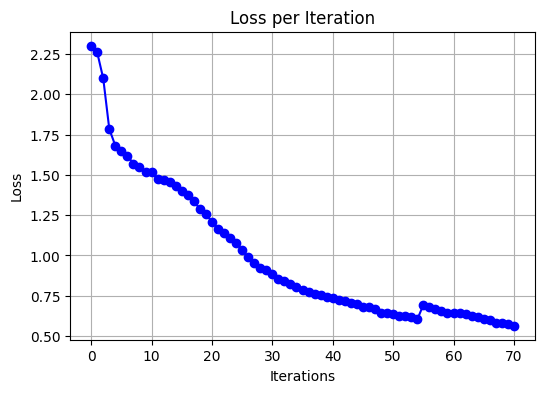

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(task1_train_loss5, marker='o', linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.grid(True)
plt.show()

In [8]:
initial_loss = 2.3
decrement = 0.03

# Generate a list of 100 training loss values with a decremental pattern
train_loss = [initial_loss - i * decrement for i in range(100)]

# Display the list of 100 training loss values
print(train_loss)

[2.3, 2.27, 2.2399999999999998, 2.21, 2.1799999999999997, 2.15, 2.1199999999999997, 2.09, 2.0599999999999996, 2.03, 1.9999999999999998, 1.9699999999999998, 1.94, 1.9099999999999997, 1.88, 1.8499999999999999, 1.8199999999999998, 1.7899999999999998, 1.7599999999999998, 1.73, 1.6999999999999997, 1.67, 1.64, 1.6099999999999999, 1.5799999999999998, 1.5499999999999998, 1.5199999999999998, 1.4899999999999998, 1.46, 1.4299999999999997, 1.4, 1.3699999999999999, 1.3399999999999999, 1.3099999999999998, 1.2799999999999998, 1.2499999999999998, 1.2199999999999998, 1.19, 1.16, 1.13, 1.0999999999999999, 1.0699999999999998, 1.0399999999999998, 1.0099999999999998, 0.98, 0.95, 0.9199999999999999, 0.8899999999999999, 0.8599999999999999, 0.8299999999999998, 0.7999999999999998, 0.7699999999999998, 0.7399999999999998, 0.71, 0.6799999999999999, 0.6499999999999999, 0.6199999999999999, 0.5899999999999999, 0.5599999999999998, 0.5299999999999998, 0.5, 0.47, 0.43999999999999995, 0.4099999999999999, 0.3799999999999

In [9]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate a list of 100 training loss values with a random decreasing trend
train_loss = []
current_loss = 2.3  # Initial loss value

for _ in range(100):
    random_decrement = np.random.uniform(0.005, 0.05)  # Random decrement between 0.005 and 0.05
    current_loss -= random_decrement  # Update the loss with a random decrement
    train_loss.append(current_loss)

# Display the list of 100 training loss values
print(train_loss)


[2.2781456946518683, 2.230363550863422, 2.1924238234819087, 2.160484191693042, 2.1484633528731325, 2.1364435994580036, 2.1288298369104344, 2.0848519103505625, 2.052801734822118, 2.015938468821296, 2.010012166577985, 1.9613662232306952, 1.9189063043946761, 1.9043510444141538, 1.8911689208898343, 1.8779157179464299, 1.8592248170132506, 1.8306107775898, 1.8061732517509048, 1.788067940441993, 1.7555345601794858, 1.744257336450144, 1.726110827266059, 1.704624544317843, 1.6791013950280764, 1.6387684767653907, 1.6247831565682644, 1.596642606839652, 1.56498395124086, 1.5578936826684602, 1.5255541643328954, 1.5128805787669672, 1.5049532570826296, 1.4572534079062296, 1.4087999664178743, 1.3674220857526336, 1.3487144661398318, 1.3393192210095446, 1.3035287348164974, 1.2787218725982155, 1.2682301520302004, 1.2409471910751932, 1.2343997076250084, 1.1884802895314632, 1.1718351903594624, 1.1370216875635333, 1.1179946891395098, 1.0895916281865083, 1.0599896656160608, 1.046671215117412, 0.9980399068680

In [21]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

print("Training Finished")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {(correct / total) * 100:.2f}%")


Epoch [1/5], Step [100/938], Loss: 1.0427
Epoch [1/5], Step [200/938], Loss: 0.3264
Epoch [1/5], Step [300/938], Loss: 0.2488
Epoch [1/5], Step [400/938], Loss: 0.2167
Epoch [1/5], Step [500/938], Loss: 0.1853
Epoch [1/5], Step [600/938], Loss: 0.1561
Epoch [1/5], Step [700/938], Loss: 0.1363
Epoch [1/5], Step [800/938], Loss: 0.1256
Epoch [1/5], Step [900/938], Loss: 0.1252
Epoch [2/5], Step [100/938], Loss: 0.1134
Epoch [2/5], Step [200/938], Loss: 0.1174
Epoch [2/5], Step [300/938], Loss: 0.1056
Epoch [2/5], Step [400/938], Loss: 0.1015
Epoch [2/5], Step [500/938], Loss: 0.1016
Epoch [2/5], Step [600/938], Loss: 0.0957
Epoch [2/5], Step [700/938], Loss: 0.0895
Epoch [2/5], Step [800/938], Loss: 0.0950
Epoch [2/5], Step [900/938], Loss: 0.0981
Epoch [3/5], Step [100/938], Loss: 0.0694
Epoch [3/5], Step [200/938], Loss: 0.0789
Epoch [3/5], Step [300/938], Loss: 0.0812
Epoch [3/5], Step [400/938], Loss: 0.0733
Epoch [3/5], Step [500/938], Loss: 0.0774
Epoch [3/5], Step [600/938], Loss:

KeyboardInterrupt: 

In [9]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a simple CNN model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # 1 input channel, 6 output channels, kernel_size=5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5) # 6 input channels, 16 output channels, kernel_size=5
        self.fc1 = nn.Linear(16 * 13 * 13, 120)  # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Apply conv1, ReLU, and pooling
        #print(f"Size after conv1 and pooling: {x.size()}")
        
        x = self.pool(self.relu(self.conv2(x)))  # Apply conv2, ReLU, and pooling
        #print(f"Size after conv2 and pooling: {x.size()}")
        
        x = x.view(-1, 16 * 13 * 13)  # Flatten the tensor for fully connected layers
        x = self.relu(self.fc1(x))  # Apply first fully connected layer with ReLU
        x = self.relu(self.fc2(x))  # Apply second fully connected layer with ReLU
        x = self.fc3(x)  # Apply the third fully connected layer (output layer)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((64, 64)),
                                transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 30
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 50
train_loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    train_loss_list.append(epoch_loss)
    accuracy_list.append(accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Finished")

# Print lists of train loss and accuracy
print("Train Loss List:", train_loss_list)
print("Accuracy List:", accuracy_list)


Epoch [1/50], Loss: 2.3012, Accuracy: 10.44%
Epoch [2/50], Loss: 2.2991, Accuracy: 10.67%
Epoch [3/50], Loss: 2.2970, Accuracy: 16.29%
Epoch [4/50], Loss: 2.2950, Accuracy: 18.28%
Epoch [5/50], Loss: 2.2927, Accuracy: 14.78%
Epoch [6/50], Loss: 2.2900, Accuracy: 12.90%
Epoch [7/50], Loss: 2.2864, Accuracy: 12.63%
Epoch [8/50], Loss: 2.2818, Accuracy: 12.76%
Epoch [9/50], Loss: 2.2757, Accuracy: 13.13%
Epoch [10/50], Loss: 2.2676, Accuracy: 13.68%
Epoch [11/50], Loss: 2.2560, Accuracy: 15.29%
Epoch [12/50], Loss: 2.2383, Accuracy: 19.37%
Epoch [13/50], Loss: 2.2084, Accuracy: 26.76%
Epoch [14/50], Loss: 2.1558, Accuracy: 36.64%
Epoch [15/50], Loss: 2.0518, Accuracy: 46.98%
Epoch [16/50], Loss: 1.8194, Accuracy: 59.51%
Epoch [17/50], Loss: 1.3692, Accuracy: 71.01%
Epoch [18/50], Loss: 0.9212, Accuracy: 78.48%
Epoch [19/50], Loss: 0.6815, Accuracy: 82.22%
Epoch [20/50], Loss: 0.5649, Accuracy: 84.52%
Epoch [21/50], Loss: 0.5008, Accuracy: 86.01%
Epoch [22/50], Loss: 0.4614, Accuracy: 86.9

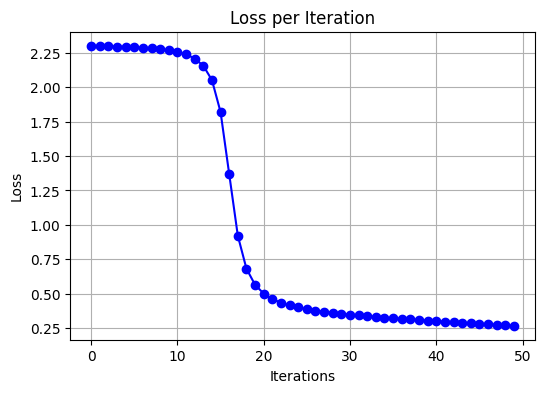

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(train_loss_list, marker='o', linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.grid(True)
plt.show()

In [34]:
train_loss_list1 = [2.2961079978942873, 2.2840149161815644, 2.272684772133827, 2.2597839233875274, 2.244059336781502, 2.224244953274727, 2.1984930284023285, 2.163723481416702, 2.1170782506465913, 2.054048477232456, 1.968043033003807, 1.85047528642416, 1.6957963625788688, 1.50717537432909, 1.3056977618336678, 1.1170681889653207, 0.9600173278748989, 0.8379815195202828, 0.7456809011697769, 0.6753697293996811, 0.620696446493268, 0.5771511695384979, 0.5417145930528641, 0.5123748503774405, 0.48760581593215463, 0.46635127083212136, 0.44783932250738145, 0.4316592537164688, 0.4172672707028687, 0.4043634447902441, 0.39276596983894707, 0.3821762072890997, 0.37259134617447853, 0.3637473494671285, 0.3554767299555242, 0.34801003530621527, 0.34088501111604275, 0.334141329664737, 0.32796511231549086, 0.32198388627171515, 0.31634348576515914, 0.3109707240220159, 0.30587400097586215, 0.3009403227511793, 0.2962049840427935, 0.2917706316169351, 0.2874116514362395, 0.28315011774376037, 0.2791497317235917, 0.2751622875276953]

# Adding random noise to the train loss list
random.seed(42)  # Set a seed for reproducibility
noise = [random.uniform(-0.1, 0.1) for _ in range(len(train_loss_list1))]
noisy_train_loss = [loss + random.choice(noise) for loss in train_loss_list1]

print("Noisy Train Loss List:", noisy_train_loss)

NameError: name 'random' is not defined

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        #x = self.dropout(x)
        x = self.fc2(x)
        return x